In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [2]:
# MSA = Metropolitan Statistical Area
# An MSA must have a population of at least 50,000 
# An MSA refers to a region that includes a central city and surrounding urbanized areas with a high degree of economic integration. 
# The counties that make up the Nashville MSA are: Cannon, Cheatham, Davidson, Dickson, Macon, Maury, Robertson, Rutherford, Smith Sumner, Trousdale, Williamson and Wilson

In [3]:
# Data sources:
# https://www.zillow.com/research/data/
# https://fred.stlouisfed.org/series/
# https://www.freddiemac.com/pmms

In [4]:
# msp = Median Sale Price
msp = pd.read_csv('data/Metro_median_sale_price_uc_sfrcondo_sm_week.csv')

In [5]:
# asp = Average Sale Price
asp = pd.read_csv('data/Metro_mean_sale_price_now_uc_sfrcondo_month.csv')

In [6]:
# Rename columns
asp = asp.rename(columns = {'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state'})

In [7]:
# Creating a new column displaying just the city name
# asp['city'] = asp['region'].str.slice(0, -4)

In [8]:
msp = msp.rename(columns = {'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state'})

# Finding the current avg and median sale prices in Nashville and nationally

In [9]:
# Isolating Nashville row
# Most recent avg sale price for Nashville
nash_asp = asp.loc[asp['region'] == 'Nashville, TN']
nash_asp_recent = nash_asp['2025-06-30']
nash_asp_recent

36    630222.0
Name: 2025-06-30, dtype: float64

In [10]:
# National average sale price
nat_asp = asp.loc[asp['region_type'] == 'country']
nat_asp_recent = nat_asp['2025-06-30']
nat_asp_recent

0    514720.0
Name: 2025-06-30, dtype: float64

In [11]:
# Most recent median sale price for Nashville
nash_msp = msp.loc[msp['region'] == 'Nashville, TN']
nash_msp_recent = nash_msp['2025-06-14']
nash_msp_recent

35    465000.0
Name: 2025-06-14, dtype: float64

In [12]:
# Isolating the National median prices
# National median sale price
nat_msp = msp.loc[msp['region_type'] == 'country']
nat_msp_recent = nat_msp['2025-06-14']
nat_msp_recent

0    373125.0
Name: 2025-06-14, dtype: float64

# Nashville avg and median sales prices in the past decade

In [13]:
# Looking at Nashville average sale price 2015-2025
nash_asp.loc[:, '2015-01-31':'2025-06-30']

,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
36,220486.0,217951.0,229646.0,237584.0,249983.0,254621.0,252886.0,240763.0,238516.0,230362.0,...,557957.0,563231.0,595326.0,601491.0,567624.0,591334.0,600920.0,599486.0,615478.0,630222.0


In [14]:
# Looking at Nashville median sale price 2015-2025
nash_msp.loc[:, '2015-01-03':'2025-06-14']

,2015-01-03,2015-01-10,2015-01-17,2015-01-24,2015-01-31,2015-02-07,2015-02-14,2015-02-21,2015-02-28,2015-03-07,...,2025-04-12,2025-04-19,2025-04-26,2025-05-03,2025-05-10,2025-05-17,2025-05-24,2025-05-31,2025-06-07,2025-06-14
35,169313.0,167450.0,163425.0,160950.0,162441.0,163191.0,164191.0,169166.0,169975.0,172475.0,...,442637.0,443486.0,445986.0,448486.0,448486.0,450000.0,450000.0,457500.0,463750.0,465000.0


# Finding the avg and median sale prices for 2025

In [15]:
# Once I calculate all of the avg and median sales prices for each year of the last decade, 
# I would like to add those findings as columns back to the main dataframes

In [16]:
# Year to date median sale price
nash_msp_2025 = nash_msp.loc[:,'2025-01-04':'2025-06-14']
nash_msp_2025

,2025-01-04,2025-01-11,2025-01-18,2025-01-25,2025-02-01,2025-02-08,2025-02-15,2025-02-22,2025-03-01,2025-03-08,...,2025-04-12,2025-04-19,2025-04-26,2025-05-03,2025-05-10,2025-05-17,2025-05-24,2025-05-31,2025-06-07,2025-06-14
35,424106.0,421606.0,422250.0,422250.0,417500.0,418750.0,415000.0,421250.0,425000.0,430250.0,...,442637.0,443486.0,445986.0,448486.0,448486.0,450000.0,450000.0,457500.0,463750.0,465000.0


In [17]:
# Latest Nashville median home price in 2025 in 465,000

In [18]:
# Median sale price 2025
nash_msp_2025_total = nash_msp_2025.median(axis=1)
nash_msp_2025_total

35    434899.0
dtype: float64

In [19]:
nash_asp_2025 = nash_asp.loc[:,'2025-01-31':'2025-06-30']
nash_asp_2025

,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
36,567624.0,591334.0,600920.0,599486.0,615478.0,630222.0


In [20]:
# Avg sale price 2025
nash_asp_2025_total = nash_asp_2025.mean(axis=1)
nash_asp_2025_total 

36    600844.0
dtype: float64

# Changing the msp & asp dataframes so the dates are now data instead of column headers

In [21]:
temp_msp = msp.columns.to_list()[5:]

In [22]:
temp_msp_2 = msp.columns.to_list()[:5]

In [23]:
msp_alt = msp.melt(value_vars = temp_msp, id_vars = temp_msp_2)

In [24]:
msp_alt.rename(columns={'variable': 'date', 'value': 'sale_price'}, inplace=True)

In [25]:
msp_alt['date'] = pd.to_datetime(msp_alt['date'], format='%Y-%m-%d')

In [26]:
# msp_alt['sale_price'] = msp_alt['sale_price'].astype(int)

In [27]:
temp_asp = asp.columns.to_list()[5:]

In [28]:
temp_asp_2 = asp.columns.to_list()[:5]

In [29]:
asp_alt = asp.melt(value_vars = temp_asp, id_vars = temp_asp_2)

In [30]:
asp_alt.rename(columns={'variable': 'date', 'value': 'sale_price'}, inplace=True)

In [31]:
asp_alt['date'] = pd.to_datetime(asp_alt['date'], format='%Y-%m-%d')

# Calculate the avg & median sale price for every year of the past 15 years for Nashville & nationally

In [122]:
#asp_alt_2025 = (asp_alt['date'] >= '2025-01-01') & (asp_alt['date'] <= '2025-06-30') & (asp_alt['region'] == 'Nashville, TN')
#nash_asp_alt_2025 = asp_alt.loc[asp_alt_2025]
#nash_asp_alt_2025['sale_price'].mean()

In [123]:
nat_vs_nash_msp_2010_2025 = msp_alt[(msp_alt['region'].isin(['Nashville, TN', 'United States'])) &(msp_alt['date'] >= '2010-01-01') &(msp_alt['date'] <= '2025-12-31')]

In [124]:
nash_msp_2016_2025 = msp_alt[(msp_alt['region'].isin(['Nashville, TN'])) &(msp_alt['date'] >= '2016-01-01') &(msp_alt['date'] <= '2025-12-31')]

In [125]:
# Finding the median home price in Nashville just for 2024
# msp_alt[(msp_alt['region'].isin(['Nashville, TN'])) &(msp_alt['date'] >= '2024-01-01') &(msp_alt['date'] <= '2024-12-31')].groupby('year')['sale_price'].median()

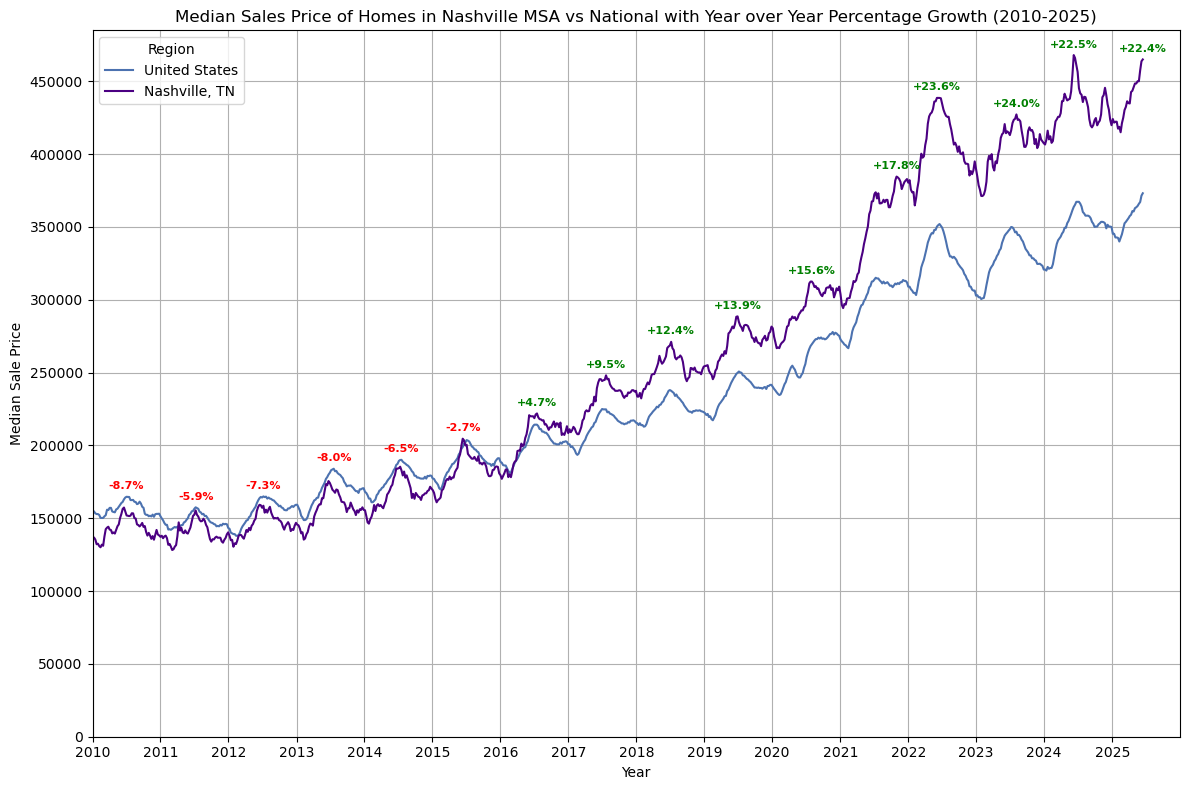

In [126]:
df = nat_vs_nash_msp_2010_2025.copy()
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

nash_col = "Nashville, TN"
us_col   = "United States"

plt.figure(figsize=(12,8))
ax = sns.lineplot(
    data=df,
    x="date",
    y="sale_price",
    hue="region",
    palette={nash_col: "indigo", us_col: "#4C72B0"})

plt.title("Median Sales Price of Homes in Nashville MSA vs National with Year over Year Percentage Growth (2010-2025)")
plt.xlabel("Year")
plt.ylabel("Median Sale Price")
plt.ylim(bottom=0)
plt.legend(title="Region")
plt.grid(True)

ax.yaxis.set_major_locator(MultipleLocator(50000))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

mask = (df["year"] >= 2010) & (df["year"] <= 2025)
annual = (
    df.loc[mask]
      .groupby(["year", "region"], as_index=False)["sale_price"]
      .median())

wide = (annual.pivot(index="year", columns="region", values="sale_price")
          .sort_index())

if (nash_col in wide.columns) and (us_col in wide.columns):
    wide["pct_diff_vs_us"] = (wide[nash_col] - wide[us_col]) / wide[us_col] * 100

    
    for yr in sorted(df.loc[mask, "year"].unique()):
       
        year_rows = df[(df["year"] == yr)]
        if yr not in wide.index or year_rows.empty or pd.isna(wide.loc[yr, "pct_diff_vs_us"]):
            continue

       
        nmax = year_rows.loc[year_rows["region"] == nash_col, "sale_price"].max()
        umax = year_rows.loc[year_rows["region"] == us_col,   "sale_price"].max()

        if pd.isna(nmax) and pd.isna(umax):
            continue

        top_region = nash_col if (pd.notna(nmax) and (pd.isna(umax) or nmax >= umax)) else us_col
        top_point = (
            year_rows[year_rows["region"] == top_region]
            .sort_values("sale_price", ascending=False)
            .iloc[0])

        x = top_point["date"]
        y = top_point["sale_price"]
        pct = wide.loc[yr, "pct_diff_vs_us"]

        ax.annotate(
            f"{pct:+.1f}%",
            (x, y),
            xytext=(0, 4),
            textcoords="offset points",
            ha="center", va="bottom",
            fontsize=8, fontweight="bold",
            color=("green" if pct >= 0 else "red"),
            zorder=5, clip_on=False)

ax.set_xlim(pd.Timestamp("2010-01-01"), pd.Timestamp("2025-12-31"))

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

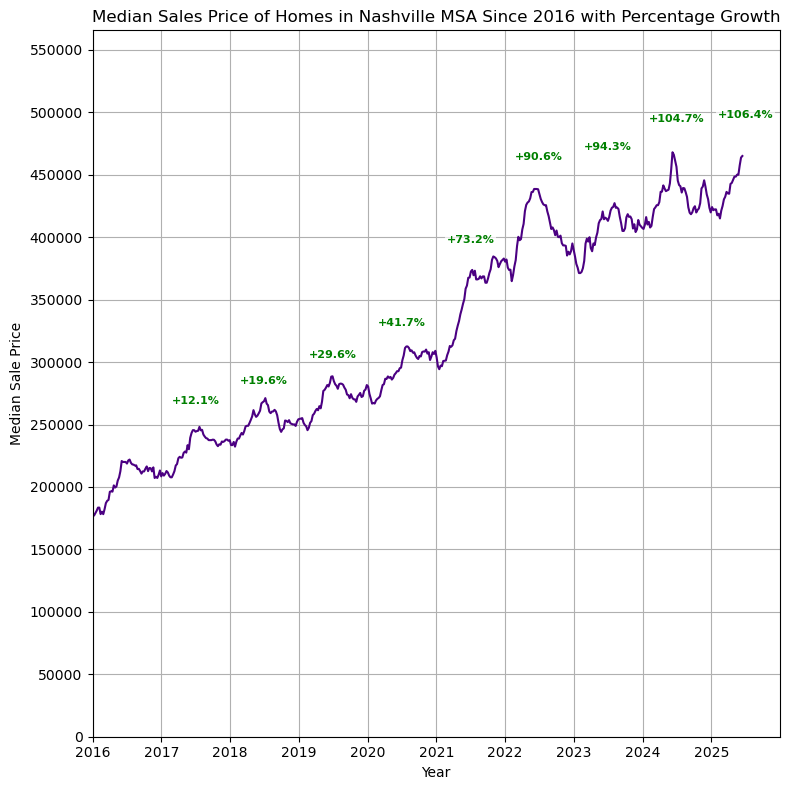

In [37]:
df = nash_msp_2016_2025.copy()
df["date"] = pd.to_datetime(df["date"])
nash_col, us_col = "Nashville, TN", "United States"

plt.figure(figsize=(8,8))
sns.lineplot(
    data=df, 
    x='date', 
    y='sale_price', 
    hue='region',
    palette={nash_col: "indigo", us_col: "#4C72B0"})

plt.title('Median Sales Price of Homes in Nashville MSA Since 2016 with Percentage Growth')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.ylim(bottom=0)
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(50000))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

leg = ax.get_legend()
if leg is not None:
    leg.remove()

df["year"] = df["date"].dt.year
mask_years = (df["year"] >= 2016) & (df["year"] <= 2025)
annual = df.loc[mask_years].groupby(["year", "region"], as_index=False)["sale_price"].median()
wide = annual.pivot(index="year", columns="region", values="sale_price").sort_index()

if (2016 in wide.index) and (nash_col in wide.columns):
    baseline_2016 = wide.loc[2016, nash_col]
    wide["pct_change_from_2016"] = (wide[nash_col] - baseline_2016) / baseline_2016 * 100

    y_min, y_max = ax.get_ylim()
    y_span = y_max - y_min if y_max > y_min else 1.0

    base_offset = max(25000, 0.06 * y_span)
    recent_extra = max(30000, 0.06 * y_span)

    ax.set_ylim(y_min, y_max + base_offset + recent_extra + 0.05 * y_span)

   
    for yr, pct in wide["pct_change_from_2016"].dropna().items():
        if yr == 2016:  
            continue
        
        x = pd.Timestamp(f"{yr}-07-01")
        y_line = wide.loc[yr, nash_col]
        offset = base_offset + (recent_extra if yr >= 2022 else 0)

        color = "green" if pct >= 0 else "red"
        ax.text(
            x, y_line + offset, f"{pct:+.1f}%",
            ha="center", va="bottom",
            fontsize=8, fontweight="bold",
            color=color,
            zorder=6,
            clip_on=False,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1))


ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2025-12-31'))
#plt.savefig('Median Sales Price of Homes in Nashville MSA Since 2016 with Percentage Growth.png')
plt.tight_layout()
plt.show()


In [38]:
# Showing the Nashville % growth against the U.S.
#nash_vs_us_pct_change = annual_price_msp.pivot(index='year', columns='region', values='sale_price').reset_index()

In [39]:
#nash_vs_us_pct_change['pct_gap_vs_us'] = ((nash_vs_us_pct_change['Nashville, TN'] - nash_vs_us_pct_change['United States']) / nash_vs_us_pct_change['United States']) * 100

In [40]:
#nash_vs_us_pct_change

In [41]:
nat_vs_nash_asp_2010_2025 = asp_alt[(asp_alt['region'].isin(['Nashville, TN', 'United States'])) & (asp_alt['date'] >= '2010-01-01') & (asp_alt['date'] <= '2025-12-31')]

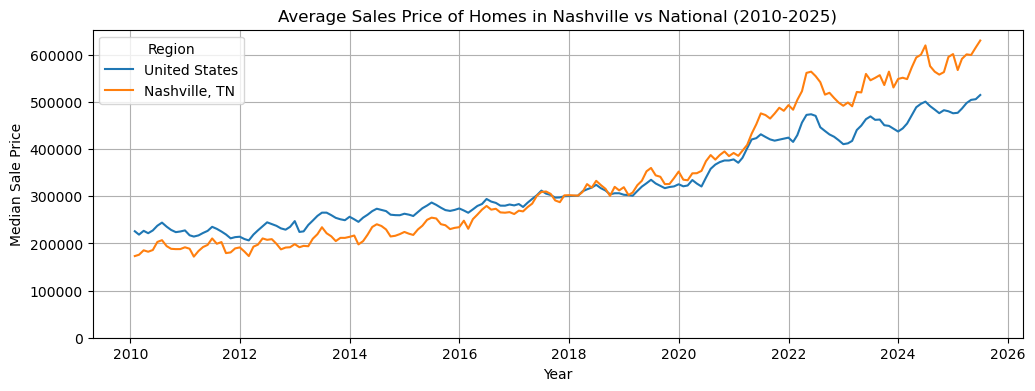

In [42]:
plt.figure(figsize=(12,4))

sns.lineplot(data  = nat_vs_nash_asp_2010_2025, x='date', y='sale_price', hue='region')

plt.title('Average Sales Price of Homes in Nashville vs National (2010-2025)')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.ylim(bottom=0)
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [43]:
# Current highest average home prices by city
current_msp = msp_alt[['region','date', 'sale_price']]
current_msp.sort_values(by='sale_price', ascending=False).head(1)

,region,date,sale_price
241058,"San Jose, CA",2025-04-26,1680625.0


In [44]:
sj_vs_nash_msp_2010_2025 = msp_alt[(msp_alt['region'].isin(['Nashville, TN', 'San Jose, CA'])) &(msp_alt['date'] >= '2010-01-01') &(msp_alt['date'] <= '2025-12-31')]

In [45]:
#plt.figure(figsize=(12,6))

#sns.lineplot(data  = sj_vs_nash_msp_2010_2025, x='date', y='sale_price', hue='region')

#plt.title('Median Sales Price of Homes in San Jose vs Nashville (2010-2025)')
#plt.xlabel('Year')
#plt.ylabel('Median Sale Price in Millions')
#plt.ylim(bottom=0)
#plt.legend(title='Region')
#plt.grid(True)
#plt.show()

In [46]:
sj_vs_nash_asp_2010_2025 = asp_alt[(asp_alt['region'].isin(['Nashville, TN', 'San Jose, CA'])) &(asp_alt['date'] >= '2010-01-01') &(asp_alt['date'] <= '2025-12-31')]

In [47]:
#plt.figure(figsize=(12,6))

#sns.lineplot(data  = sj_vs_nash_asp_2010_2025, x='date', y='sale_price', hue='region')

#plt.title('Median Sales Price of Homes in San Jose vs Nashville (2010-2025)')
#plt.xlabel('Year')
#plt.ylabel('Average Sale Price in Millions')
#plt.ylim(bottom=0)
#plt.legend(title='Region')
#plt.grid(True)
#plt.show()

# Looking into new builds

In [48]:
new_b = pd.read_csv('data/Metro_new_construction_sales_count_raw_uc_sfrcondo_month.csv')

In [49]:
temp_new = new_b.columns.to_list()[5:]

In [50]:
temp_new_2 = new_b.columns.to_list()[:5]

In [51]:
new_build = new_b.melt(value_vars = temp_new, id_vars = temp_new_2)

In [52]:
new_build.rename(columns={'variable': 'date', 'value': 'new_builds'}, inplace=True)

In [53]:
new_build = new_build.rename(columns = {'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state'})

In [54]:
new_build['date'] = pd.to_datetime(new_build['date'], format='%Y-%m-%d')

In [55]:
new_build['year'] = new_build['date'].dt.year

In [56]:
new_build_nash = new_build.loc[new_build['region'] == 'Nashville, TN']

In [57]:
new_build_nash['new_builds'] = new_build_nash['new_builds'].astype(int)

C:\Users\jvd97\AppData\Local\Temp\ipykernel_25988\439341199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_build_nash['new_builds'] = new_build_nash['new_builds'].astype(int)


In [58]:
# Summing the count of new builds in Nashville by year
nb_nash = new_build_nash.groupby('year')['new_builds'].sum().reset_index()

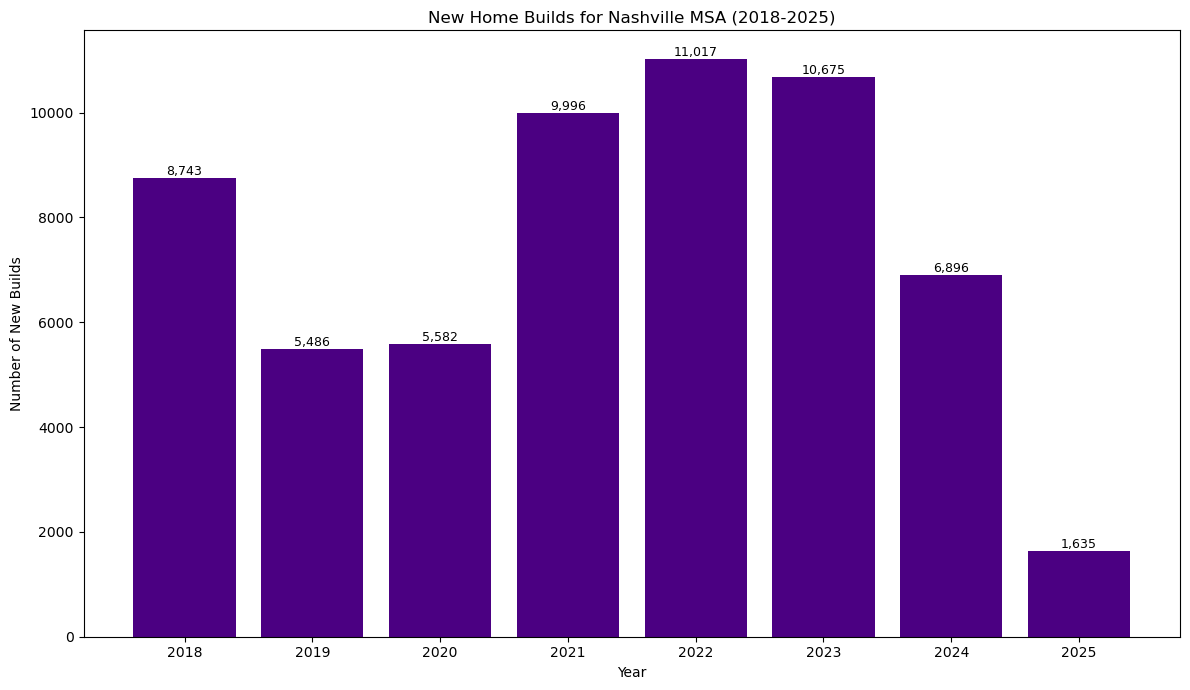

In [59]:
yearly_builds = new_build_nash.groupby('year')['new_builds'].sum()

plt.figure(figsize=(12,7))
plt.bar(yearly_builds.index, yearly_builds.values, color="indigo")

plt.title('New Home Builds for Nashville MSA (2018-2025)')
plt.xlabel('Year')
plt.ylabel('Number of New Builds')
plt.xticks(yearly_builds.index, rotation=0)

for x, y in zip(yearly_builds.index, yearly_builds.values):
    plt.text(x, y, f'{y:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
#plt.savefig('New Home Builds for Nashville MSA (2018-2025).png')
plt.show()

# ------------

In [60]:
new_con = pd.read_csv('data/Metro_new_construction_median_sale_price_uc_sfrcondo_month.csv')

In [61]:
new_con

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,102001,0,United States,country,NaN,312433.0,314643.0,321000.0,320000.0,328410.0,...,419900.0,419490.0,433000.0,437545.0,440000.0,430602.5,434050.0,433490.0,429990.0,425000.0
1,394913,1,"New York, NY",msa,NY,591000.0,648414.0,612422.0,612500.0,620000.0,...,1110000.0,1034824.5,862990.0,947500.0,985000.0,1098654.0,950000.0,975000.0,1039525.0,950000.0
2,753899,2,"Los Angeles, CA",msa,CA,895000.0,793500.0,844000.0,852450.0,933000.0,...,1060500.0,1475000.0,1364950.0,1299990.0,1369000.0,1590000.0,1600000.0,1505000.0,1655000.0,1581000.0
3,394463,3,"Chicago, IL",msa,IL,342974.0,374990.0,353637.0,360500.0,385000.0,...,482500.0,471140.0,499990.0,489745.0,547767.0,545908.0,496115.0,558601.5,538804.0,518990.0
4,394514,4,"Dallas, TX",msa,TX,328086.0,324641.0,322059.0,322995.0,355022.0,...,416681.5,428999.0,450000.0,457115.0,463925.0,435000.0,435000.0,420000.0,424990.0,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,394905,341,"New Bern, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,355000.0,344275.0,348750.0,342000.0
141,753912,398,"Pinehurst, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,411860.0,423520.0,443200.0,426700.0,400000.0,447154.0,438000.0,420000.0,433000.0,414900.0
142,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728500.0,1670000.0
143,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,1251050.0,1361309.0,2516135.0,1295000.0,2004500.0,2315500.0,1727000.0,1800000.0,1277500.0,2129125.0


In [62]:
temp_new_con = new_con.columns.to_list()[5:]
temp_new_con_2 = new_con.columns.to_list()[:5]
new_cons = new_con.melt(value_vars = temp_new_con, id_vars = temp_new_con_2)
new_cons.rename(columns = {'variable': 'date', 'value': 'new_build_sales', 'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state'}, inplace=True) 
new_cons['date'] = pd.to_datetime(new_cons['date'], format='%Y-%m-%d')
new_cons['year'] = new_cons['date'].dt.year
new_cons_nash = new_cons.loc[new_cons['region'] == 'Nashville, TN']
new_cons_nash = new_cons_nash.groupby('year')['new_build_sales'].median().reset_index()

# Nashville MSA Population

In [63]:
nash_msa_pop = pd.read_csv('data/nash_msa_pop.csv')

In [64]:
nash_msa_pop['population'] = (nash_msa_pop['population'] * 1000).round().astype(int)

# Nashville MSA Income merge w/ MSA Population

In [65]:
nash_msa_income = pd.read_csv('data/nash_msa_median_income.csv')

In [66]:
nash_msa_pop_income = pd.merge(nash_msa_income, nash_msa_pop, on='year', how='inner')

In [67]:
nash_msa_pop_income

,year,income,population
0,2000,31918,1317580
1,2001,32224,1343263
2,2002,32870,1363834
3,2003,33852,1386743
4,2004,35330,1416452
5,2005,36419,1450538
6,2006,38486,1489156
7,2007,39410,1524920
8,2008,40565,1556368
9,2009,40232,1582264


In [68]:
nash_msa_pop_income_new_build = pd.merge(nash_msa_pop_income, nb_nash, on = 'year', how = 'inner')
nash_msa_pop_income_new_build 

,year,income,population,new_builds
0,2018,57312,1906794,8743
1,2019,60654,1933455,5486
2,2020,63959,2021825,5582
3,2021,71439,2033685,9996
4,2022,75477,2077922,11017
5,2023,79453,2113986,10675
6,2024,82499,2150553,6896


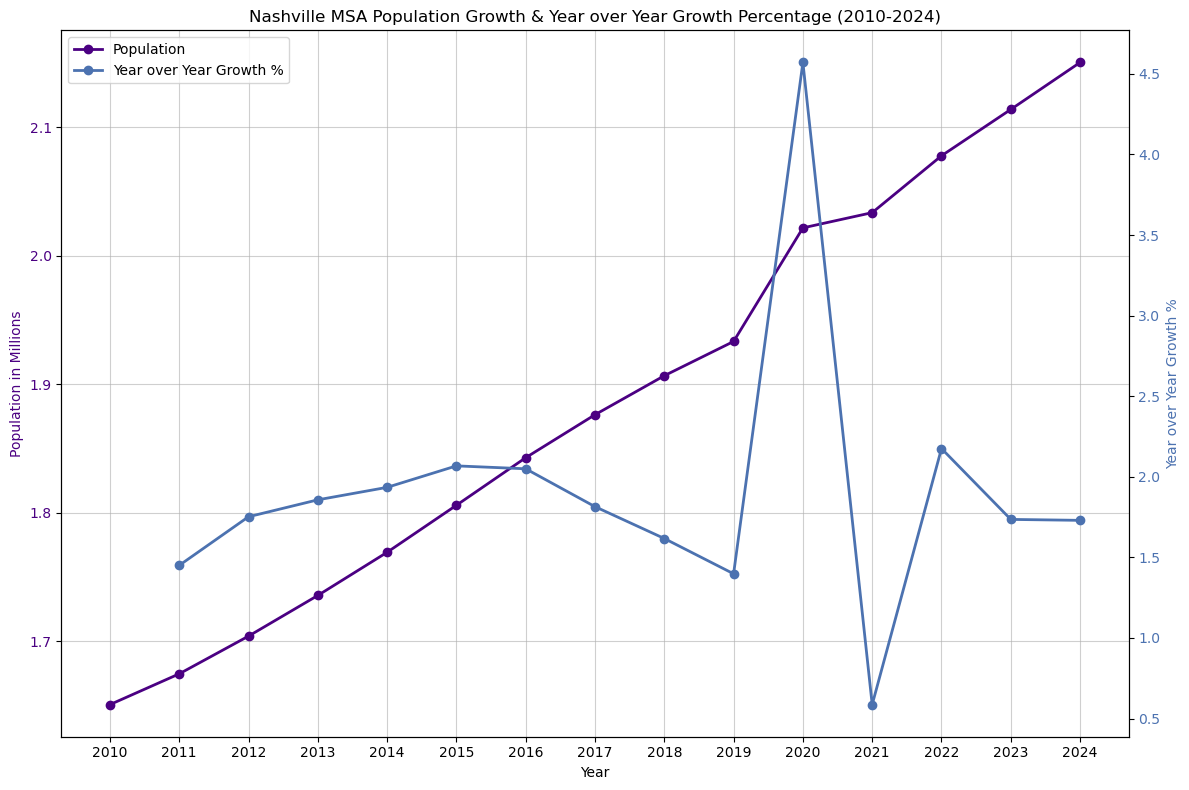

In [69]:
df = nash_msa_pop_income.copy()
df = df[(df["year"] >= 2010) & (df["year"] <= 2024)].sort_values("year")

df["yoy_growth_pct"] = df["population"].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(
    df["year"],
    df["population"] / 1_000_000,  
    marker="o", color="indigo", linewidth=2, label="Population")
ax1.set_ylabel("Population in Millions", color="indigo")
ax1.tick_params(axis="y", labelcolor="indigo")

ax2 = ax1.twinx()
ax2.plot(
    df["year"],
    df["yoy_growth_pct"],
    marker="o", color="#4C72B0", linewidth=2, label="Year over Year Growth %")
ax2.set_ylabel("Year over Year Growth %", color="#4C72B0")
ax2.tick_params(axis="y", labelcolor="#4C72B0")

ax1.set_title("Nashville MSA Population Growth & Year over Year Growth Percentage (2010-2024)")
ax1.set_xlabel("Year")
ax1.set_xticks(df["year"])

ax1.grid(True, linestyle="-", alpha=0.6)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left")

plt.tight_layout()
#plt.savefig('Nashville MSA Population Growth & Year over Year Growth Percentage (2010-2024).png')
plt.show()

In [70]:
# This chart shows the year over year growth and population increase.
# 2020 around end of pandemic is when nashville had big boost of population being around 100K people coming to the area

# Inventory

In [71]:
interim_1 = pd.read_csv('data/Metro_inventoryt_forsale_uc_sfrcondo_sm_monthly.csv')

In [72]:
temp_inv = interim_1.columns.to_list()[5:]
temp_inv_2 = interim_1.columns.to_list()[:5]
inven = interim_1.melt(value_vars = temp_inv, id_vars = temp_inv_2)
inven.rename(columns = {'variable': 'date', 'value': 'inventory', 'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state'}, inplace=True) 
inven['date'] = pd.to_datetime(inven['date'], format='%Y-%m-%d')
inven['year'] = inven['date'].dt.year
inv_nash = inven.loc[inven['region'] == 'Nashville, TN']
inv_nash = inv_nash.groupby('year')['inventory'].sum().reset_index()

In [73]:
inv_nash

,year,inventory
0,2018,87172.0
1,2019,113060.0
2,2020,98708.0
3,2021,61912.0
4,2022,70974.0
5,2023,79465.0
6,2024,90548.0
7,2025,49776.0


# Nashville Renting

In [74]:
zori = pd.read_csv('data/City_zori_uc_sfrcondomfr_sm_month.csv')

In [75]:
temp_zori = zori.columns.to_list()[8:]
temp_zori_2 = zori.columns.to_list()[:8]
zori_comb = zori.melt(value_vars = temp_zori, id_vars = temp_zori_2)
zori_comb.rename(columns = {'variable': 'date', 'value': 'rent_price', 'RegionID' : 'region_id', 'SizeRank' : 'size_rank', 'RegionName' : 'region', 'RegionType' : 'region_type', 'StateName' : 'state', 'Metro' : 'metro', 'CountyName' : 'county'}, inplace=True)
zori_comb['date'] = pd.to_datetime(zori_comb['date'], format='%Y-%m-%d')
zori_comb['year'] = zori_comb['date'].dt.year
zori_comb.loc[zori_comb['region'] == 'Nashville']
nash_median_rent_price = zori_comb.groupby('year')['rent_price'].median().reset_index()

In [76]:
nash_median_rent_price['rent_price'] = nash_median_rent_price['rent_price'].round().astype(int)
nash_median_rent_price

,year,rent_price
0,2015,1203
1,2016,1251
2,2017,1302
3,2018,1366
4,2019,1434
5,2020,1494
6,2021,1650
7,2022,1814
8,2023,1851
9,2024,1900


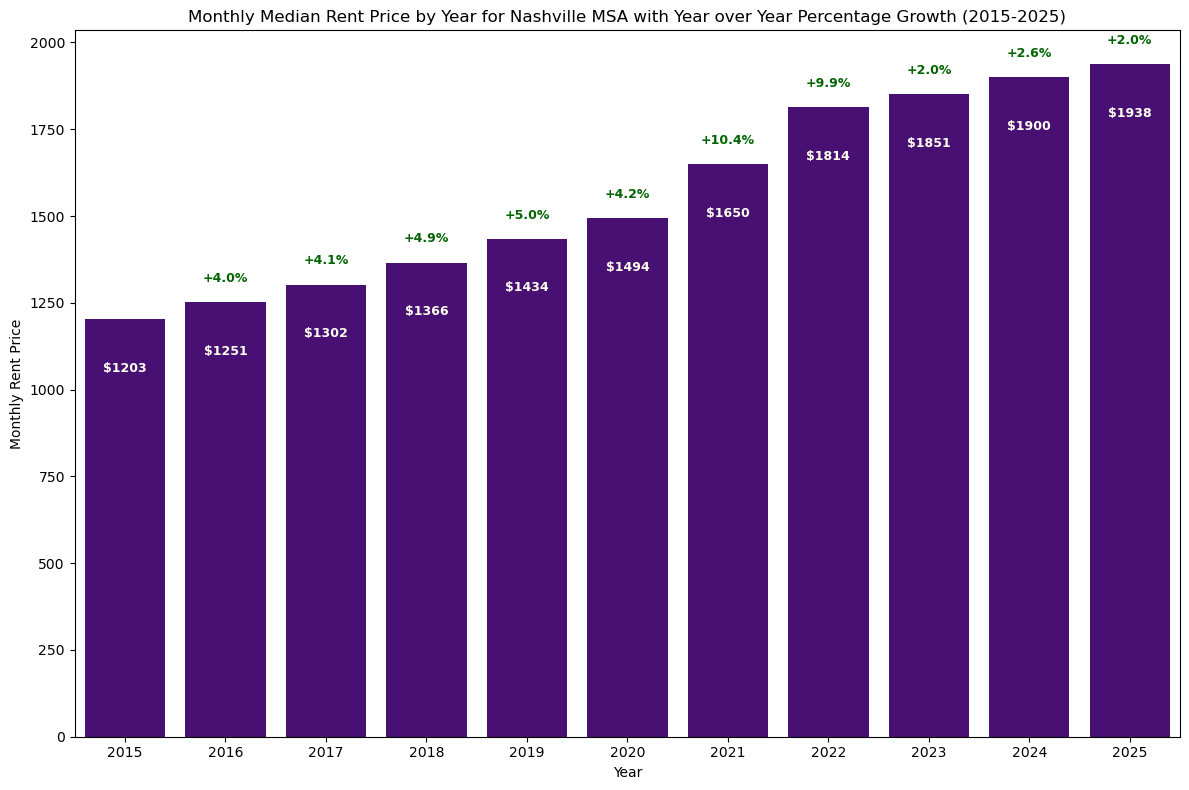

In [77]:
nash_median_rent_price = nash_median_rent_price.copy()
nash_median_rent_price["yoy_pct"] = nash_median_rent_price["rent_price"].pct_change() * 100

plt.figure(figsize=(12,8))
ax = sns.barplot(x='year', y='rent_price', data=nash_median_rent_price, color='indigo')

ax.bar_label(
    ax.containers[0],
    labels=[f"${int(v)}" for v in nash_median_rent_price['rent_price']],
    padding=-40,             
    fontsize=9,
    color="ivory",
    fontweight="bold")

for idx, (x, y, pct) in enumerate(zip(nash_median_rent_price["year"], 
                                      nash_median_rent_price["rent_price"], 
                                      nash_median_rent_price["yoy_pct"])):
    if idx > 0: 
        sign = "+" if pct > 0 else "" 
        ax.text(
            idx, y + 50,  
            f"{sign}{pct:.1f}%", 
            ha="center", va="bottom",
            fontsize=9, color="darkgreen", fontweight="bold")

ax.set_title('Monthly Median Rent Price by Year for Nashville MSA with Year over Year Percentage Growth (2015-2025)')
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Rent Price')
ax.set_xticks(range(len(nash_median_rent_price['year'])))
ax.set_xticklabels(nash_median_rent_price['year'], rotation=0)

plt.tight_layout()
#plt.savefig('Monthly Median Rent Price by Year for Nashville MSA with Year over Year Percentage Growth (2015-2025).png')
plt.show()

In [78]:
zori_comb.loc[zori_comb['region'] == 'Nashville']
nash_median_rent_price = zori_comb.groupby('year')['rent_price'].median().reset_index()

In [79]:
# Between 2018 and 2024, Nashville’s population surged over 12% while incomes climbed an impressive 43%. Despite periods of strong construction activity, new home builds have not consistently matched population growth — and the sharp drop in 2024 could set the stage for renewed housing shortages. This combination of rising demand and inconsistent supply helps explain the intense competition and rising prices in the Nashville housing market.

# Mortgage vs rent in Nashville

In [80]:
nash_median_rent_price['annual_rent'] = nash_median_rent_price['rent_price'] * 12

In [81]:
nash_median_rent_price

,year,rent_price,annual_rent
0,2015,1202.846971,14434.163647
1,2016,1250.924317,15011.091803
2,2017,1301.921073,15623.052871
3,2018,1365.574926,16386.899110
4,2019,1433.627597,17203.531163
5,2020,1493.724265,17924.691176
6,2021,1649.738908,19796.866900
7,2022,1814.479087,21773.749041
8,2023,1851.463056,22217.556677
9,2024,1899.797318,22797.567817


In [82]:
msp_alt

,region_id,size_rank,region,region_type,state,date,sale_price
0,102001,0,United States,country,NaN,2008-02-23,169875.0
1,394913,1,"New York, NY",msa,NY,2008-02-23,398750.0
2,753899,2,"Los Angeles, CA",msa,CA,2008-02-23,467375.0
3,394463,3,"Chicago, IL",msa,IL,2008-02-23,215750.0
4,394692,5,"Houston, TX",msa,TX,2008-02-23,141642.0
...,...,...,...,...,...,...,...
243171,394542,396,"Dubuque, IA",msa,IA,2025-06-14,265121.0
243172,753912,398,"Pinehurst, NC",msa,NC,2025-06-14,423375.0
243173,394410,408,"Brainerd, MN",msa,MN,2025-06-14,359925.0
243174,394744,442,"Key West, FL",msa,FL,2025-06-14,879675.0


In [83]:
msp_alt['year'] = msp_alt['date'].dt.year

In [84]:
nashville_msp_2 = msp_alt[(msp_alt['region'] == 'Nashville, TN') & (msp_alt['year'] >= 2015) & (msp_alt['year'] <= 2025)]

In [85]:
nashville_home_price_median_per_year = (nashville_msp_2.groupby('year')['sale_price'].median().reset_index())

In [86]:
nashville_home_price_median_per_year

,year,sale_price
0,2015,184007.0
1,2016,210688.0
2,2017,236211.0
3,2018,252010.5
4,2019,273087.5
5,2020,298525.5
6,2021,364856.5
7,2022,401563.0
8,2023,409373.0
9,2024,431331.5


In [87]:
nash_median_housing_costs = pd.read_csv('data/nashville_median_housing_costs.csv')

In [88]:
nash_median_housing_costs = nash_median_housing_costs.rename(columns={'avg_mortgage_rate_pct ' : 'mortgage_rate'})

In [89]:
nash_median_housing_costs

,year,sale_price,mortgage_rate,tax_rate_usd,tax-rate,down_pct,loan_pct,loan_term_years,loan_term_months,maintenance_pct,...,monthly_pmt,annual_pi,effective_tax_rate,tax_year,maintenance_year,insurance_year,monthly_home_costs,annual_owner_cost,monthly_rent,annual_rent
0,2015,184007,3.85,4.516,0.04516,0.2,0.8,30,360,0.01,...,690.11,8281.34,0.01,2077.44,1840.07,920.035,1093.24,13118.89,1202.85,14434.16
1,2016,210688,3.65,4.516,0.04516,0.2,0.8,30,360,0.01,...,771.05,9252.60,0.01,2378.67,2106.88,1053.440,1232.63,14791.59,1250.92,15011.09
2,2017,236211,4.00,3.155,0.03155,0.2,0.8,30,360,0.01,...,902.17,10825.99,0.01,1863.11,2362.11,1181.055,1352.69,16232.27,1301.92,15623.05
3,2018,252010,4.56,3.155,0.03155,0.2,0.8,30,360,0.01,...,1028.72,12344.62,0.01,1987.73,2520.10,1260.050,1509.37,18112.50,1365.57,16386.90
4,2019,273087,3.90,3.155,0.03155,0.2,0.8,30,360,0.01,...,1030.45,12365.42,0.01,2153.97,2730.87,1365.435,1551.31,18615.70,1433.63,17203.53
5,2020,298525,3.10,4.221,0.04221,0.2,0.8,30,360,0.01,...,1019.80,12237.61,0.01,3150.19,2985.25,1492.625,1655.47,19865.67,1493.72,17924.69
6,2021,364856,2.96,3.288,0.03288,0.2,0.8,30,360,0.01,...,1224.31,14691.72,0.01,2999.12,3648.56,1824.280,1930.31,23163.68,1649.74,19796.87
7,2022,401563,5.34,3.254,0.03254,0.2,0.8,30,360,0.01,...,1791.91,21502.88,0.01,3266.72,4015.63,2007.815,2566.09,30793.04,1814.48,21773.75
8,2023,409373,7.00,3.254,0.03254,0.2,0.8,30,360,0.01,...,2178.86,26146.26,0.01,3330.25,4093.73,2046.865,2968.09,35617.10,1851.46,22217.56
9,2024,431331,6.72,3.254,0.03254,0.2,0.8,30,360,0.01,...,2231.21,26774.48,0.01,3508.88,4313.31,2156.655,3062.78,36753.33,1899.80,22797.57


In [90]:
nash_median_housing_costs["pct_diff_owner_vs_rent"] = ((nash_median_housing_costs["annual_owner_cost"] - nash_median_housing_costs["annual_rent"]) / nash_median_housing_costs["annual_rent"]) * 100

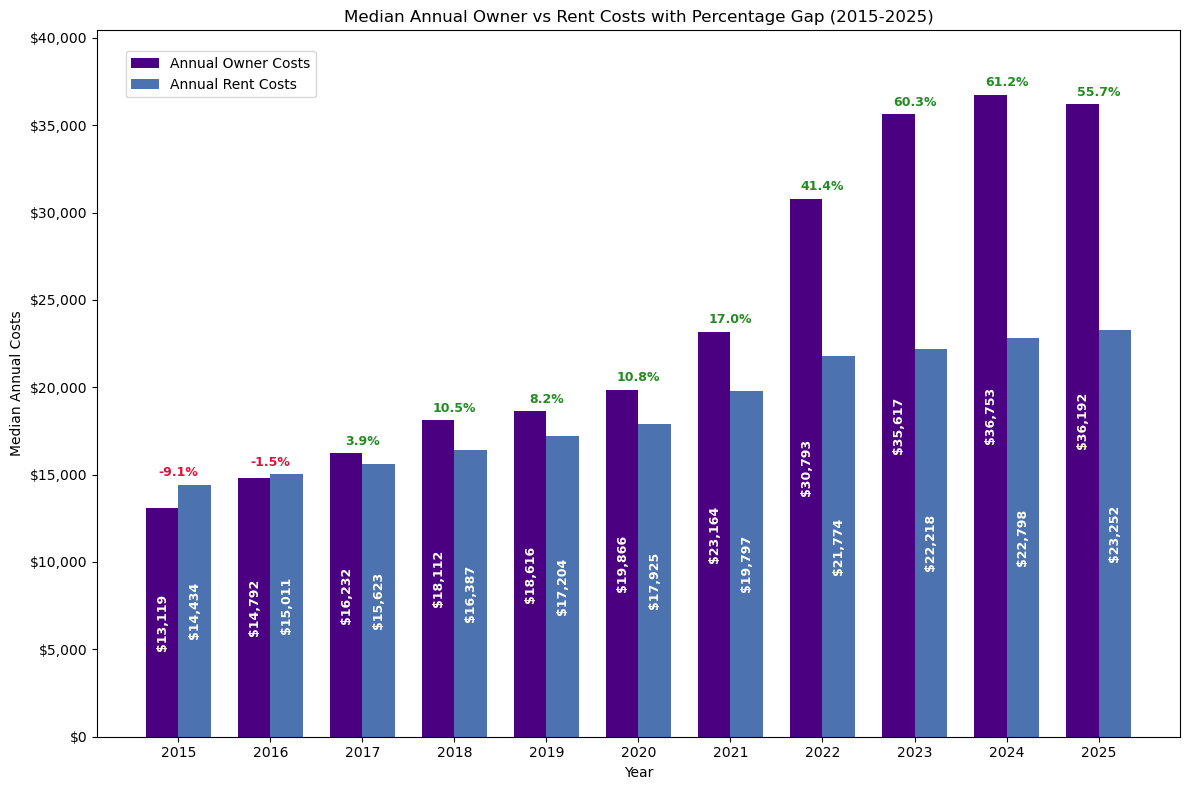

In [91]:
years = nash_median_housing_costs["year"].astype(int)
owner_costs = nash_median_housing_costs["annual_owner_cost"]
rent_costs = nash_median_housing_costs["annual_rent"]
pct_gap = nash_median_housing_costs["pct_diff_owner_vs_rent"]

x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, owner_costs, width, label="Annual Owner Costs", color="indigo")
bars2 = ax.bar(x + width/2, rent_costs, width, label="Annual Rent Costs", color="#4C72B0")

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

def add_inside_labels(bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h/2,                             
            f"${h:,.0f}",
            ha="center", va="center",
            rotation=90,
            color="ivory", fontsize=9, fontweight="bold")

add_inside_labels(bars1)
add_inside_labels(bars2)

y_max_series = np.maximum(owner_costs.values, rent_costs.values)

for xi, ymax, pct in zip(x, y_max_series, pct_gap):
    color = "forestgreen" if pct >= 0 else "crimson"
    ax.annotate(
        f"{pct:.1f}%", 
        xy=(xi, ymax),                  
        xytext=(0, 4),                  
        textcoords="offset points",
        ha="center", va="bottom",
        fontsize=9, fontweight="bold", color=color)

ax.set_ylim(top=max(y_max_series) * 1.1)

ax.set_xlabel("Year")
ax.set_ylabel("Median Annual Costs")
ax.set_title("Median Annual Owner vs Rent Costs with Percentage Gap (2015-2025)")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(loc="upper left", bbox_to_anchor=(0.02, 0.98))

plt.tight_layout()
#plt.savefig('Median Annual Owner vs Rent Costs with Percentage Gap (2015-2025).png')

plt.show()

In [92]:
# Investigate median house price to median income in Nashville

# Income vs home price in Nashville

In [93]:
nash_msp_pop_income = pd.merge(nash_msa_pop_income, nashville_home_price_median_per_year, on="year", how="inner")

In [94]:
nash_msp_pop_income = nash_msp_pop_income[(nash_msp_pop_income["year"] >= 2015) & (nash_msp_pop_income["year"] <= 2024)]

In [95]:
nash_msp_pop_income

,year,income,population,sale_price
0,2015,50678,1805988,184007.0
1,2016,52374,1843004,210688.0
2,2017,54232,1876449,236211.0
3,2018,57312,1906794,252010.5
4,2019,60654,1933455,273087.5
5,2020,63959,2021825,298525.5
6,2021,71439,2033685,364856.5
7,2022,75477,2077922,401563.0
8,2023,79453,2113986,409373.0
9,2024,82499,2150553,431331.5


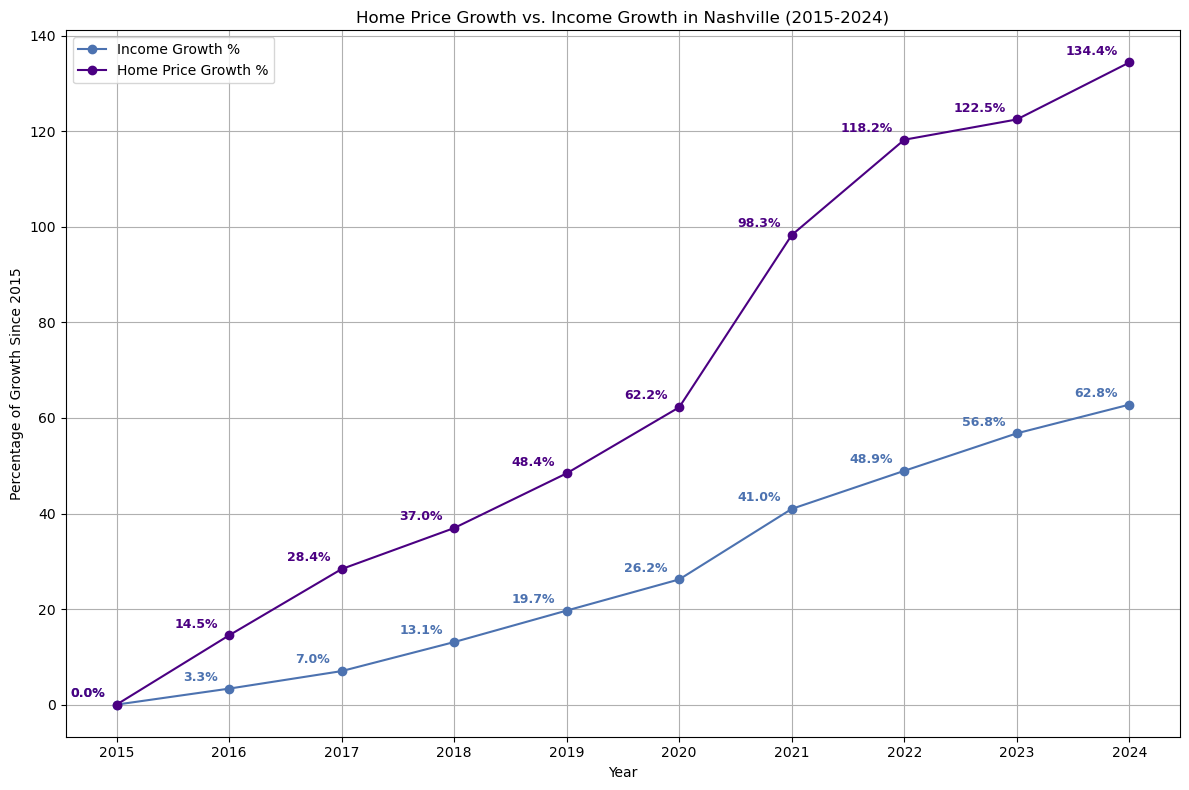

In [96]:
nash_msp_pop_income["income_growth_pct"] = (
    (nash_msp_pop_income["income"] - nash_msp_pop_income["income"].iloc[0]) 
    / nash_msp_pop_income["income"].iloc[0] * 100)

nash_msp_pop_income["price_growth_pct"] = (
    (nash_msp_pop_income["sale_price"] - nash_msp_pop_income["sale_price"].iloc[0]) 
    / nash_msp_pop_income["sale_price"].iloc[0] * 100)

years = nash_msp_pop_income["year"]
income_growth = nash_msp_pop_income["income_growth_pct"]
price_growth = nash_msp_pop_income["price_growth_pct"]

plt.figure(figsize=(12,8))

plt.plot(years, income_growth, marker="o", label="Income Growth %", color="#4C72B0")

plt.plot(years, price_growth, marker="o", label="Home Price Growth %", color="indigo")

for x, y in zip(years, income_growth):
    plt.text(
        x - 0.1, y + 1, f"{y:.1f}%", 
        ha="right", va="bottom",
        fontsize=9, fontweight="bold", color="#4C72B0")

for x, y in zip(years, price_growth):
    plt.text(
        x - 0.1, y + 1, f"{y:.1f}%",  
        ha="right", va="bottom",
        fontsize=9, fontweight="bold", color="indigo")
    
plt.title("Home Price Growth vs. Income Growth in Nashville (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Percentage of Growth Since 2015")
plt.xticks(years) 
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('Home Price Growth vs. Income Growth in Nashville (2015-2024).png')

plt.show()

In [97]:
# This graph shows that since around 2015 when home prices in Nashville started surpassing national median prices, nashville's median income has increased but at a much slower rate than the median home price. 
# The gap between home prices and income is increasing, home prices are outpacing income increase

# New build count vs sale prices in Nashville

In [98]:
inter_df = pd.merge(nash_msp_pop_income, new_cons_nash , on="year", how="inner")

In [99]:
nash_nb_msp_pop = pd.merge(inter_df, nb_nash , on="year", how="inner")

In [100]:
nash_nb_msp_pop

,year,income,population,sale_price,income_growth_pct,price_growth_pct,new_build_sales,new_builds
0,2018,57312,1906794,252010.5,13.090493,36.957018,367006.00,8743
1,2019,60654,1933455,273087.5,19.685070,48.411473,362837.75,5486
2,2020,63959,2021825,298525.5,26.206638,62.235948,361573.75,5582
3,2021,71439,2033685,364856.5,40.966494,98.284033,395713.75,9996
4,2022,75477,2077922,401563.0,48.934449,118.232459,451377.50,11017
5,2023,79453,2113986,409373.0,56.780062,122.476862,465000.00,10675
6,2024,82499,2150553,431331.5,62.790560,134.410376,484997.50,6896


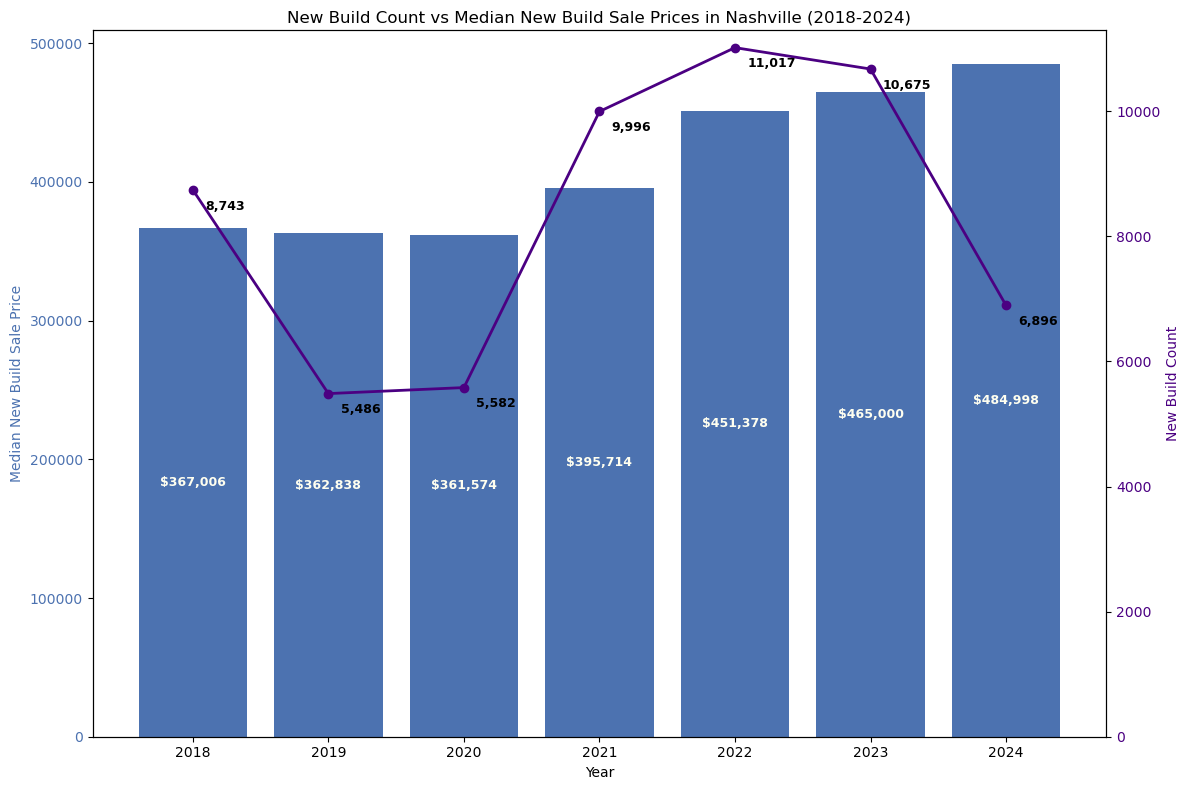

In [101]:
years = nash_nb_msp_pop["year"]
new_build_sales = nash_nb_msp_pop["new_build_sales"]
new_builds = nash_nb_msp_pop["new_builds"]

fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(years, new_build_sales, color="#4C72B0", label="Median New Build Sale Price")
ax1.set_xlabel("Year")
ax1.set_ylabel("Median New Build Sale Price", color="#4C72B0")
ax1.tick_params(axis="y", labelcolor="#4C72B0")

for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2, height/2, 
        f"${height:,.0f}",
        ha="center", va="center",
        color="ivory", fontsize=9, fontweight="bold")

ax2 = ax1.twinx()
ax2.plot(years, new_builds, color="indigo", marker="o", linewidth=2, label="New Build Count")
ax2.set_ylabel("New Build Count", color="indigo")
ax2.tick_params(axis="y", labelcolor="indigo")
ax2.set_ylim(bottom=0)  

for x, y in zip(years, new_builds):
    ax2.text(
        x + 0.09, y - (max(new_builds) * 0.014),  
        f"{y:,}",
        ha="left", va="top",
        color="black", fontsize=9, fontweight="bold")

plt.title("New Build Count vs Median New Build Sale Prices in Nashville (2018-2024)")
fig.tight_layout()
#plt.savefig('New Build Count vs Median New Build Sale Prices in Nashville.png')

plt.show()

In [102]:
# This chart shows that while the median price of home values consistantly goes up the number of new homes being built varies dropping very low during the pandemic, peaking post covid and now is trending back down.
# Pandemic did not affect home sale prices at all really

In [103]:
muju = pd.read_csv('data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# Inventory against other trends

In [104]:
nash_pop_inv = pd.merge(nash_msp_pop_income, inv_nash , on="year", how="inner")

In [105]:
nash_pop_inv

,year,income,population,sale_price,income_growth_pct,price_growth_pct,inventory
0,2018,57312,1906794,252010.5,13.090493,36.957018,87172.0
1,2019,60654,1933455,273087.5,19.685070,48.411473,113060.0
2,2020,63959,2021825,298525.5,26.206638,62.235948,98708.0
3,2021,71439,2033685,364856.5,40.966494,98.284033,61912.0
4,2022,75477,2077922,401563.0,48.934449,118.232459,70974.0
5,2023,79453,2113986,409373.0,56.780062,122.476862,79465.0
6,2024,82499,2150553,431331.5,62.790560,134.410376,90548.0


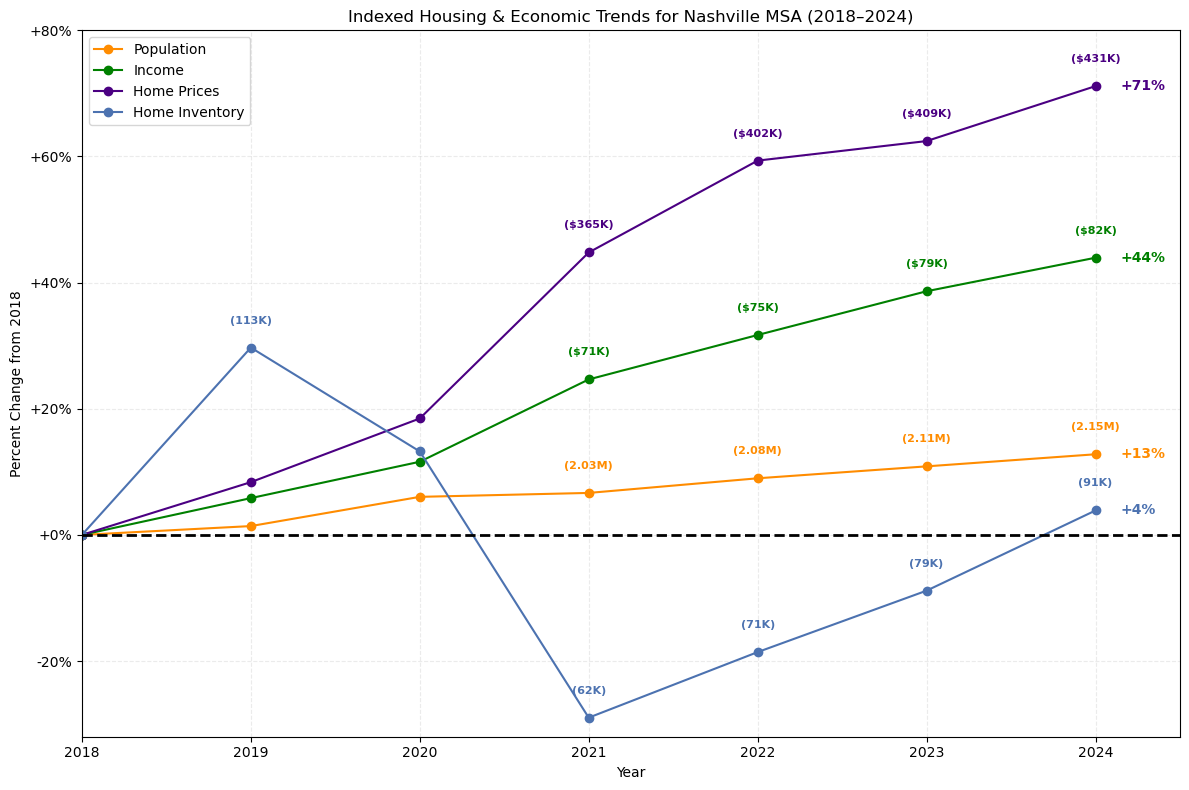

In [112]:
def abbr_m(val):  
    return f"{val/1e6:.2f}M"

def abbr_k(val):
    return f"{round(val/1_000):,}K"

d = nash_pop_inv.copy()

start_year = 2018
end_year   = int(d["year"].max())
d = d[(d["year"] >= start_year) & (d["year"] <= end_year)].reset_index(drop=True)

base = d.loc[d["year"] == start_year].iloc[0]
d["population_pct"] = d["population"] / base["population"] * 100 - 100
d["income_pct"]     = d["income"]     / base["income"]     * 100 - 100
d["prices_pct"]     = d["sale_price"] / base["sale_price"] * 100 - 100
d["inventory_pct"]  = d["inventory"]  / base["inventory"]  * 100 - 100

fig, ax = plt.subplots(figsize=(12, 8))

pop_c  = "darkorange"
inc_c  = "green"
price_c= "indigo"
inv_c  = "#4C72B0"

ax.plot(d["year"], d["population_pct"], marker="o", color=pop_c,   label="Population")
ax.plot(d["year"], d["income_pct"],     marker="o", color=inc_c,   label="Income")
ax.plot(d["year"], d["prices_pct"],     marker="o", color=price_c, label="Home Prices")
ax.plot(d["year"], d["inventory_pct"],  marker="o", color=inv_c,   label="Home Inventory")

ax.axhline(0, color="black", linestyle="--", linewidth=2)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{y:+.0f}%"))

ax.set_xlim(start_year, end_year + 0.5)
ax.set_ylim(-32, 80)

for i, row in d.iterrows():
    y = int(row["year"])

    if y >= 2021:
        ax.text(row["year"], row["population_pct"] + 3.5,
                f"({abbr_m(row['population'])})",
                color=pop_c, fontsize=8, ha="center", va="bottom", fontweight="bold")

    if y >= 2021:
        ax.text(row["year"], row["income_pct"] + 3.5,
                f"(${abbr_k(row['income'])})",
                color=inc_c, fontsize=8, ha="center", va="bottom", fontweight="bold")

    if y >= 2021:
        ax.text(row["year"], row["prices_pct"] + 3.5,
                f"(${abbr_k(row['sale_price'])})",
                color=price_c, fontsize=8, ha="center", va="bottom", fontweight="bold")

    if y == 2019 or y >= 2021:
        ax.text(row["year"], row["inventory_pct"] + 3.5,
                f"({abbr_k(row['inventory'])})",
                color=inv_c, fontsize=8, ha="center", va="bottom", fontweight="bold")

shift = 0.15
last = d.iloc[-1]
ax.text(last["year"] + shift, last["population_pct"], f"{last['population_pct']:+.0f}%",
        color=pop_c, fontsize=10, fontweight="bold", va="center", ha="left", clip_on=False)
ax.text(last["year"] + shift, last["income_pct"],     f"{last['income_pct']:+.0f}%",
        color=inc_c, fontsize=10, fontweight="bold",  va="center", ha="left", clip_on=False)
ax.text(last["year"] + shift, last["prices_pct"],     f"{last['prices_pct']:+.0f}%",
        color=price_c, fontsize=10, fontweight="bold",va="center", ha="left", clip_on=False)
ax.text(last["year"] + shift, last["inventory_pct"],  f"{last['inventory_pct']:+.0f}%",
        color=inv_c, fontsize=10, fontweight="bold",  va="center", ha="left", clip_on=False)

ax.set_title("Indexed Housing & Economic Trends for Nashville MSA (2018–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Change from 2018")
ax.set_xticks(d["year"])
ax.legend()
ax.grid(True, linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()

In [108]:
# Showing the lack of home inventory against other growing metrics population,income, and home prices

# Interest Rates

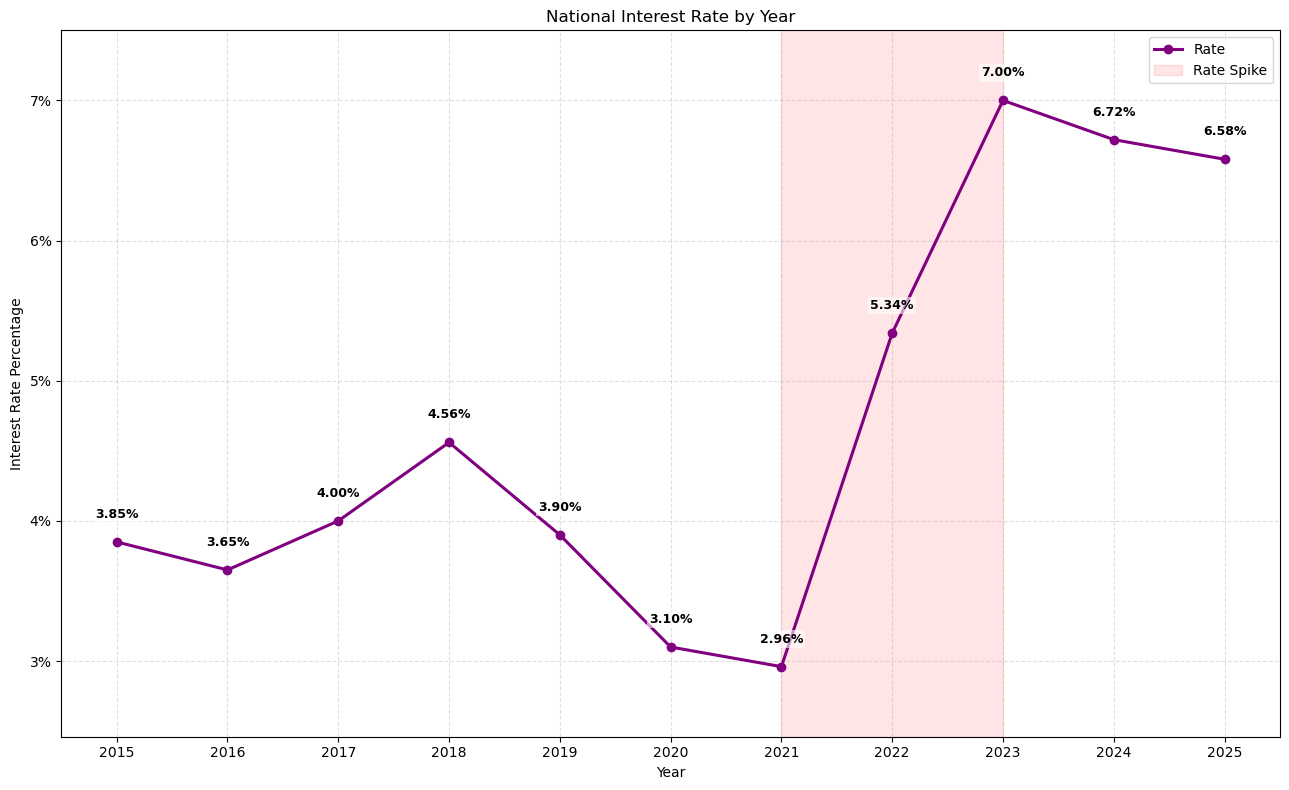

In [113]:
df = nash_median_housing_costs.copy()

fig, ax = plt.subplots(figsize=(13, 8))

ax.plot(df["year"], df["mortgage_rate"],
        marker="o", color="purple", linewidth=2.2, label="Rate")

ax.axvspan(2021, 2023, color="red", alpha=0.1, label="Rate Spike")

for x, y in zip(df["year"], df["mortgage_rate"]):
    ax.text(
        x, y + 0.15, f"{y:.2f}%",
        color="black", fontsize=9, fontweight="bold",
        ha="center", va="bottom",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1.5))

ax.set_xticks(df["year"])
ax.set_xlim(df["year"].min() - 0.5, df["year"].max() + 0.5)

ymin, ymax = df["mortgage_rate"].min(), df["mortgage_rate"].max()
ax.set_ylim(ymin - 0.5, ymax + 0.5)

ax.set_title("National Interest Rate by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Interest Rate Percentage")

ax.grid(True, linestyle="--", alpha=0.4)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
ax.legend()

plt.tight_layout()
#plt.savefig('National Interest Rate by Year.png')
plt.show()

In [110]:
# Showing the interest rate spike around COVID